<a href="https://colab.research.google.com/github/SwathilekhaV/Big_data/blob/main/Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install MiniSom


  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=f61456fa7bf82620324ed23ce7df553facb98b4f223fe111c4f804c7733836ea
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built MiniSom


In [2]:
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs


In [3]:
import pandas as pd

# Load the dataset (replace the path with your file location)
file_path = '/Mall_Customers.csv'
data = pd.read_csv(file_path)

# View the first few rows of the dataset
data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Select relevant features for clustering
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize the data for better SOM convergence
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)


In [5]:
!pip install MiniSom

from minisom import MiniSom

# Initialize SOM with a 10x10 grid and 3 input features (Age, Income, Spending Score)
som = MiniSom(x=10, y=10, input_len=3, sigma=1.0, learning_rate=0.5)

# Initialize SOM weights
som.random_weights_init(scaled_features)

# Train the SOM with 1000 iterations
som.train_random(scaled_features, num_iteration=1000)


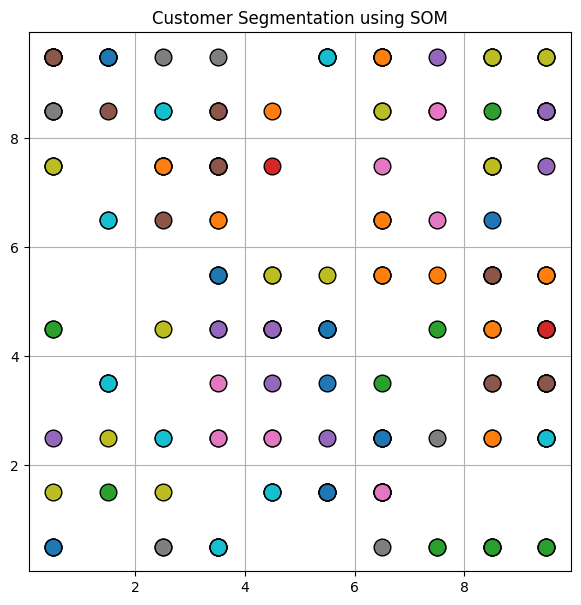

In [6]:
import matplotlib.pyplot as plt

# Plot the SOM grid with customer clusters
plt.figure(figsize=(7, 7))
for i, x in enumerate(scaled_features):
    winner = som.winner(x)  # Get the winning node for each data point
    plt.plot(winner[0] + 0.5, winner[1] + 0.5, 'o', markerfacecolor='C{}'.format(i % 10),
             markeredgecolor='k', markersize=12)
plt.title('Customer Segmentation using SOM')
plt.grid()
plt.show()


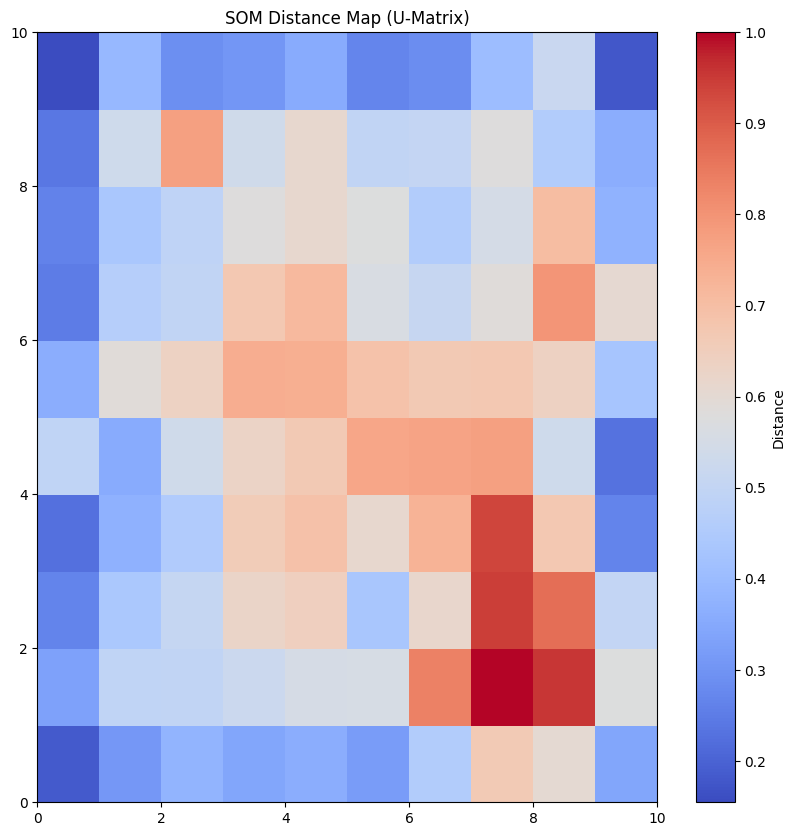

In [7]:
# Plot the U-Matrix (distance matrix) to visualize the distances between the neurons
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='coolwarm')  # Transpose for proper orientation
plt.colorbar(label='Distance')
plt.title('SOM Distance Map (U-Matrix)')
plt.show()


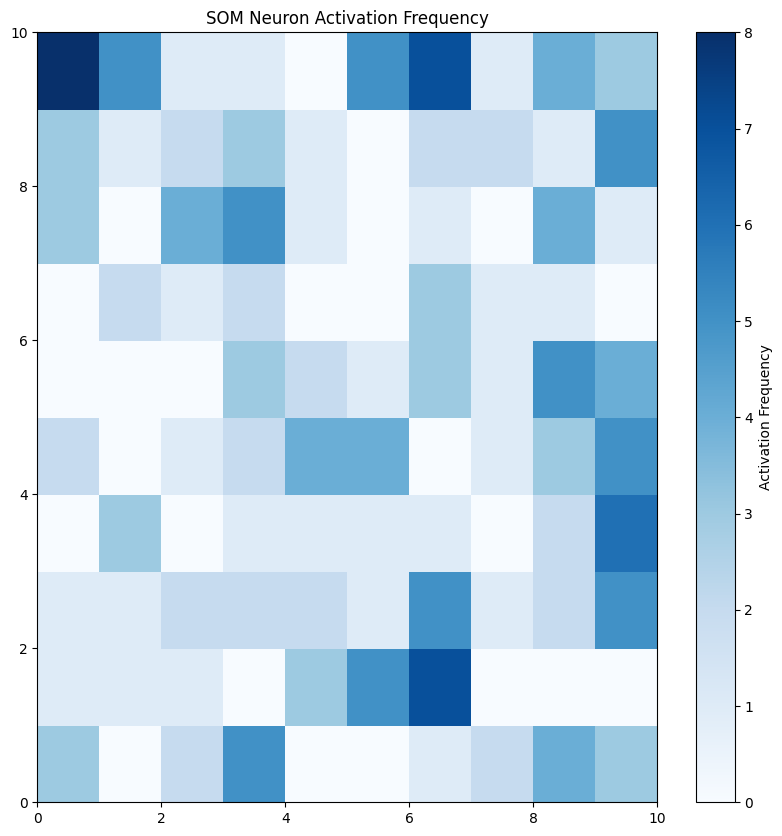

In [8]:
# Plot the frequency of activation for each neuron
activation_map = som.activation_response(scaled_features)

plt.figure(figsize=(10, 10))
plt.pcolor(activation_map.T, cmap='Blues')  # Transpose to orient correctly
plt.colorbar(label='Activation Frequency')
plt.title('SOM Neuron Activation Frequency')
plt.show()


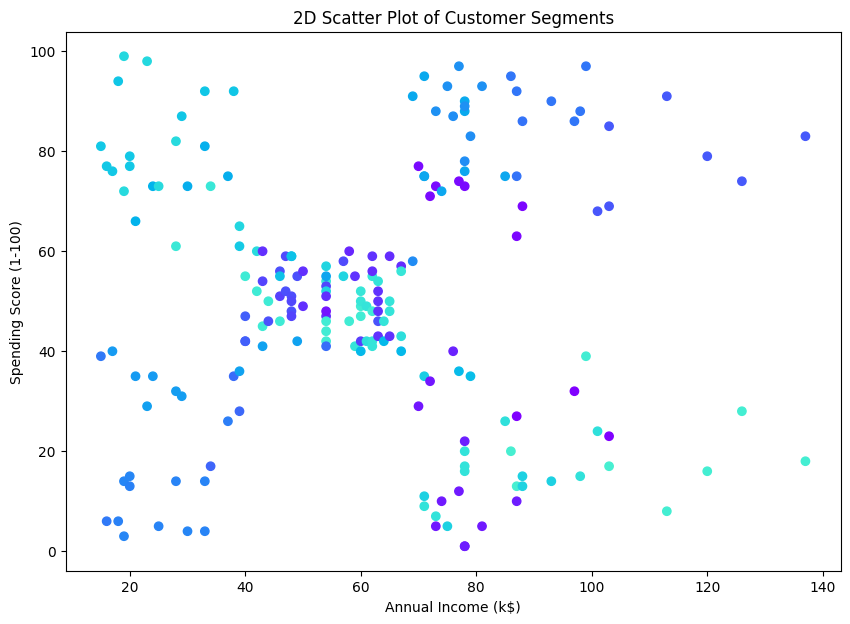

In [10]:
# Assign each data point to its SOM cluster
labels = np.array([som.winner(x) for x in scaled_features])

# Create a 2D scatter plot of 'Annual Income' and 'Spending Score'
plt.figure(figsize=(10, 7))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'],
            c=[plt.cm.rainbow(x[0] + x[1] * 10) for x in labels])  # Color by SOM clusters
plt.title('2D Scatter Plot of Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()
